In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools


In [45]:
train = pd.read_csv('C:\\Users\\Acer\\OneDrive\\Desktop\\Data Science\\HR Analytics\\train.csv')
test = pd.read_csv('C:\\Users\\Acer\\OneDrive\\Desktop\\Data Science\\HR Analytics\\test.csv')

In [46]:
train.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [47]:

train=pd.get_dummies(train, dummy_na=True)
test=pd.get_dummies(test, dummy_na=True)

In [48]:
test.head(10)

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,...,education_Below Secondary,education_Master's & above,education_nan,gender_f,gender_m,gender_nan,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,recruitment_channel_nan
0,8724,1,24,NaN,1,1,0,77,0,0,...,0,0,0,0,1,0,0,0,1,0
1,74430,1,31,3.0,5,0,0,51,0,0,...,0,0,0,1,0,0,1,0,0,0
2,72255,1,31,1.0,4,0,0,47,0,0,...,0,0,0,0,1,0,1,0,0,0
3,38562,3,31,2.0,9,0,0,65,0,0,...,0,0,0,1,0,0,1,0,0,0
4,64486,1,30,4.0,7,0,0,61,0,1,...,0,0,0,0,1,0,0,0,1,0
5,46232,1,36,3.0,2,0,0,68,0,0,...,0,0,0,0,1,0,0,0,1,0
6,54542,1,33,5.0,3,1,0,57,0,1,...,0,0,0,0,1,0,1,0,0,0
7,67269,2,36,3.0,3,0,0,85,1,0,...,0,0,0,0,1,0,0,0,1,0
8,66174,1,51,4.0,11,0,0,75,0,0,...,0,1,0,0,1,0,1,0,0,0
9,76303,1,29,5.0,2,1,0,76,0,0,...,0,0,0,0,1,0,0,0,1,0


In [49]:
#int or float
train['previous_year_rating'].fillna(train['previous_year_rating'].median(), inplace=True)
test['previous_year_rating'].fillna(test['previous_year_rating'].median(), inplace=True)

In [50]:
#type converter
train['previous_year_rating']=train.previous_year_rating.astype(int)
test['previous_year_rating']=test.previous_year_rating.astype(int)

In [51]:
train.dtypes, test.dtypes

(employee_id                     int64
 no_of_trainings                 int64
 age                             int64
 previous_year_rating            int32
 length_of_service               int64
                                 ...  
 gender_nan                      uint8
 recruitment_channel_other       uint8
 recruitment_channel_referred    uint8
 recruitment_channel_sourcing    uint8
 recruitment_channel_nan         uint8
 Length: 65, dtype: object,
 employee_id                     int64
 no_of_trainings                 int64
 age                             int64
 previous_year_rating            int32
 length_of_service               int64
                                 ...  
 gender_nan                      uint8
 recruitment_channel_other       uint8
 recruitment_channel_referred    uint8
 recruitment_channel_sourcing    uint8
 recruitment_channel_nan         uint8
 Length: 64, dtype: object)

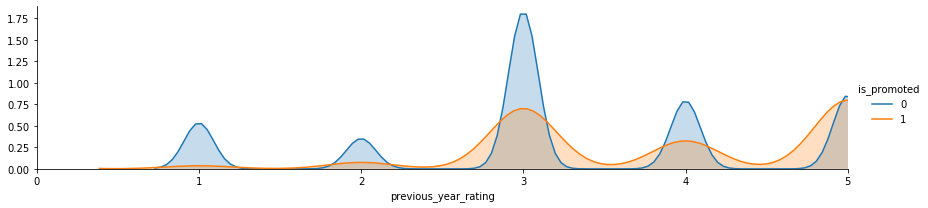

In [52]:
facet = sns.FacetGrid(train, hue="is_promoted",aspect=4)
facet.map(sns.kdeplot,'previous_year_rating',shade= True)
facet.set(xlim=(0, train['previous_year_rating'].max()))
facet.add_legend()
 
plt.show()

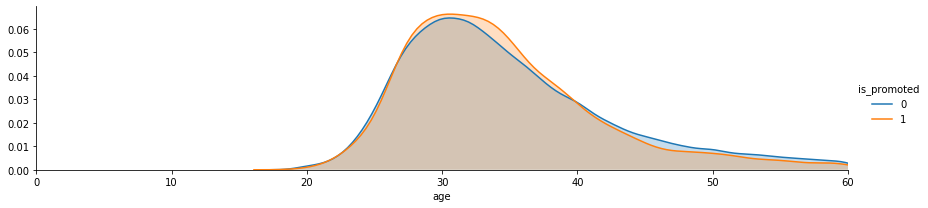

In [53]:
facet = sns.FacetGrid(train, hue="is_promoted",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, train['age'].max()))
facet.add_legend()
 
plt.show()


In [54]:
train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [55]:
train_data = train.drop('is_promoted', axis=1)
target = train['is_promoted']

train_data.shape, target.shape

((54808, 64), (54808,))

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [57]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [58]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.9171684  0.91461412 0.91516147 0.91881044 0.91534392 0.91169495
 0.90749863 0.91735085 0.91678832 0.91313869]


In [59]:
# kNN Score
round(np.mean(score)*100, 2)

91.48

In [60]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.90257252 0.90166028 0.90093049 0.90275497 0.89874111 0.90293742
 0.89819376 0.90311987 0.89963504 0.89781022]


In [61]:
# decision tree Score
round(np.mean(score)*100, 2)

90.08

In [62]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.93377121 0.93340631 0.93249407 0.93431856 0.934501   0.93048714
 0.92629082 0.92921    0.93594891 0.93156934]


In [63]:
# Random Forest Score
round(np.mean(score)*100, 2)

93.22

In [64]:
X_train = train_data
Y_train =target
X_test = test.copy()
X_train.shape, Y_train.shape, X_test.shape

((54808, 64), (54808,), (23490, 64))

In [65]:
#K-nearest (k-NN)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

92.52

In [66]:
Y_pred = Y_pred.tolist()
for i in range(len(Y_pred)):
    if Y_pred[i] == 1:
        Y_pred[i] = 1
    else:
        Y_pred[i] = 0
y_pred = np.array(Y_pred)

In [71]:
submission = pd.DataFrame({
        "employee_id": test["employee_id"],
        "is_promoted": Y_pred
    })
submission.to_csv('C:\\Users\\Acer\\OneDrive\\Desktop\\Data Science\\HR Analytics\\submission.csv', index=False)

In [72]:
submission['is_promoted'].value_counts()

0    22993
1      497
Name: is_promoted, dtype: int64

In [73]:
submission = pd.read_csv('C:\\Users\\Acer\\OneDrive\\Desktop\\Data Science\\HR Analytics\\submission.csv')
submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,1
4,64486,0


In [ ]:
from google.colab import files
files.download('submission.csv') 